In [1]:
# Move to climode directory
%cd climode/ClimODE/

## pip install whatever is required. I needed these (you may need others)
# !pip install torchdiffeq
# !pip install xarray
# !pip install git+https://github.com/patrick-kidger/torchcubicspline.git
# !pip install properscoring
## You obviously also need pytorch

/home/tornikeo/Documents/uni/adml/climode/ClimODE


/home/tornikeo/micromamba/envs/pb2/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import torch

model = torch.load('checkpoints/ClimODE_global.pt')

In [12]:

device = 'cuda'

with torch.no_grad():
    # data shape
    # num years, batch_size, K, map_height, map_width
    # K is 5, described in D.2 section. 
    # num_years is 1
    # Batch size is 1
    # map discretization is 32 x 64
    data = torch.rand(1, 1, 5, 32, 64, device=device)
    t = torch.linspace(0, 4, 5, device=device)
    mean, std, s_final = model(t, data)

print(f'output shapes mean {mean.shape}, std {std.shape}, s_final {s_final.shape}')

output shapes mean torch.Size([5, 1, 5, 32, 64]), std torch.Size([5, 1, 5, 32, 64]), s_final torch.Size([5, 1, 5, 32, 64])


<Figure size 640x480 with 0 Axes>

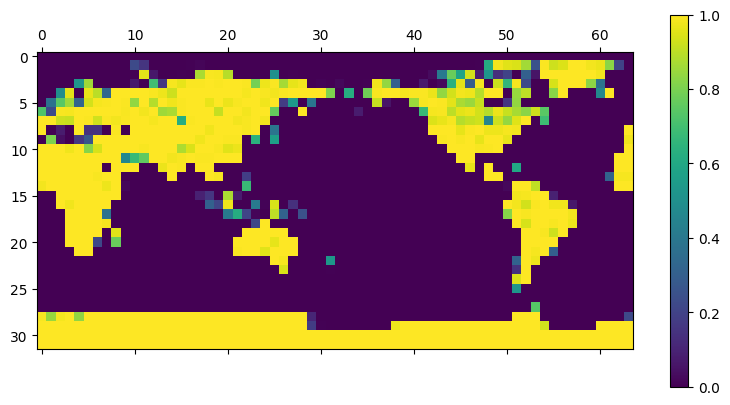

<Figure size 640x480 with 0 Axes>

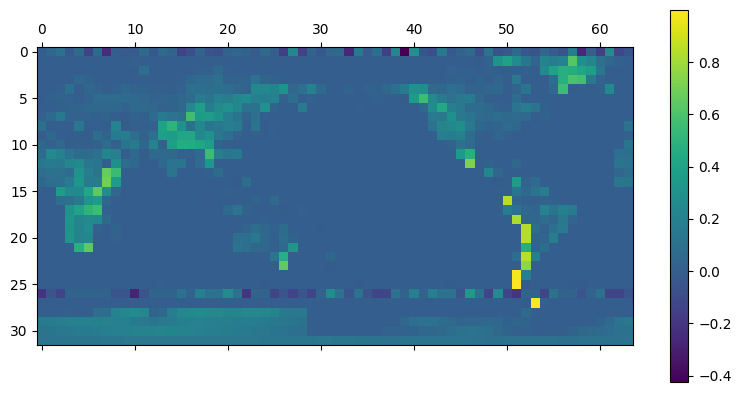

In [9]:
import matplotlib.pyplot as plt
# lsm and oro denoting static variables in the data
# phi(c) = [phi(h), phi(w), lsm, oro]
# LSM is land-sea-mask. Each pixel has 0 if sea, 1 if land
# and between if partially in sea.
# Orography mean "the branch of physical geography dealing with the formation and features of mountains"
# Oro contains elevation from sea level

plt.figure()
plt.matshow(model.lsm.squeeze().cpu().flipud())
plt.colorbar()
plt.figure()
plt.matshow(model.oro.squeeze().cpu().flipud())
plt.colorbar()